# EMSC3033 - Magnetics 1 Practical
## Magnetic Anomalies: The dipole
In this practical we'll be modeling and working with dipoles to gain an appreciation of the anomaly characteristics we discussed in the lectures. You can use the following solutions as a form of feedback on your answers to the practical questions and, of course, you should feel free to ask me questions about the solutions.

<hr 
   style="
      border:none;
      height:3px;
      background-color:black;
   ">
   
## The Dipole Anomaly
For a given dipole it is possible to calculate the total anomaly it will
produce, $F_A$, based on its position ($x$ and $z$ denote the horizontal and depth positions, respectively) combined with the geomagnetic field strength, $F$, and inclination, $I$. The total field anomaly is:

$F_A = \frac{m}{r^5}([3cos^2 I-1]x^2-6 x z sin I cos I + [3 sin^2
I - 1]{z}^2)$


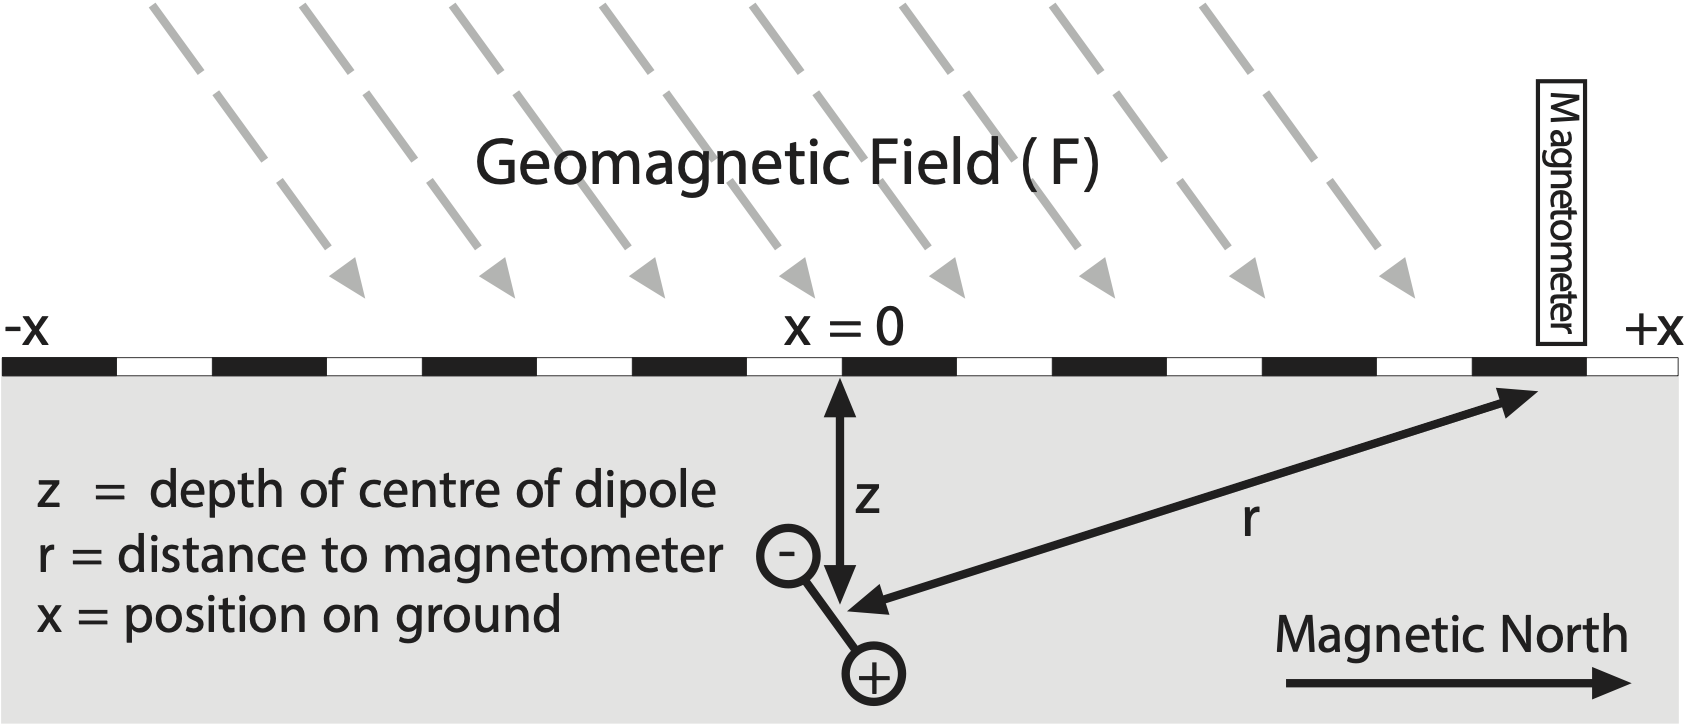

As a starting point will import the ```numpy``` (numerical operations) and ```matplotlib``` (plotting) packages 

In [1]:
import numpy as np #import numpy package
import matplotlib.pyplot as plt #import matplotlib package

### Question 1: Create a dipole model
Based on the dipole equation provided above, we can readily define a Python function to perform the calculation of the total field anomaly:

In [2]:
def dipole_FA(m,I,F,x,z):
    
    #m = magnetic moment of the dipole
    #z = depth of dipole centre [m]
    #I = geomagnetic field inclination [radians]
    #F = geomagnetic field strength [nT]
    #x = horizontal distance to center of dipole
    
    r = np.sqrt(x**2 + z**2) #seperation between dipole centre and observer
    
    term1 = (3*np.cos(I)**2-1)*x**2
    term2 = 6*x*z*np.sin(I)*np.cos(I)
    term3 = (3*np.sin(I)**2-1)*z**2
    
    FA = m / r**5 * (term1 - term2 + term3) #total field anomaly [nT]
    
    return FA

#### (a) Assuming that the Earth's magnetic field has a strength of 50,000 nT (nanoTesla) and an inclination of $I$ = +45$^\circ$, plot the total field anomaly, $F_A$, for a dipole with a cross-sectional area of $A$ = 0.5 m$^2$, magnetic susceptibility of $\kappa$ = 0.03 (no units), length $L$ = 0.5 m and and depth of $z$ = 5 m. Calculate the anomaly in 0.1 m steps from positions of $x$ = -15 m to $x$ = +15 m along a survey line oriented with magnetic north. The anomaly will have units of nanoTesla [nT].

To address this question, we'll first define the properties of the dipole, including its location:


In [3]:
L = 0.5 #distance from dipole centre to pole [m]
A = 0.5 #dipole cross-sectional area [m^2]
k = 0.03 #magnetic susceptibility of dipole [dimensionless]
z = 5 #depth of dipole centre [m]

Now we'll define the geomagnetic field strength and inclination:

In [4]:
F = 50E3 #geomagnetic field strength [nT]
I = np.deg2rad(45) #geomagnetic field inclination of 45 degrees [radians]

Given this information we can determine the magnetic moment of the dipole, which is given by:

$m = 2L*(\kappa*F*A)$

The above expression assumes that the dipole has an induced but no remanent magnetization.

In [5]:
m = 2*L*(k*F*A) #calculate the magnetic moment of the dipole

We can now model the total field magnetic anomaly with respect to position. We'll set up an array called ```x```, which contains the horizontal positions, calculate the anomaly for each position using ```dipole_FA``` and then plot the results using the ```matplotlib``` package. 

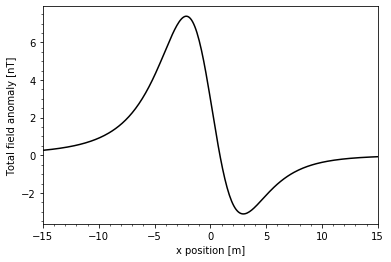

In [6]:
x = np.arange(-15,15.1,0.1) #horizontal positions, -15m to 15m (0.1m step)
FA = dipole_FA(m,I,F,x,z) #total field anomaly for each position
plt.plot(x,FA,'-k') #plot horizontal position versus total field anomaly
plt.xlabel('x position [m]') #label the x-axis
plt.ylabel('Total field anomaly [nT]') #label the y-axis
plt.xlim([-15,15]) #set horizontal limit to -15m and +15m
plt.minorticks_on() #add minor ticks to the plot
plt.show() #show the final plot

#### (b) Experiment with changing the inclination of the field and see how the shape of the $F_A$ anomaly changes will change with latitude ($\lambda$).

Remember for a geocentric axial dipole field $\tan I = 2 \tan \lambda$.

To address this problem we first need to calculate the geomagnetic field inclination for a given latitude and then plug the resulting value of $I$ into our previous calculation. From the above equation we can see that, as a function of latitude, the field inclination is given by:

$I = \arctan(2 \tan \lambda)$

As an example, if we wish to calculate the anomaly at a latitude of 70$^\circ$N, we calculate $I$ and then use the code we developed for **a**. Specifically:

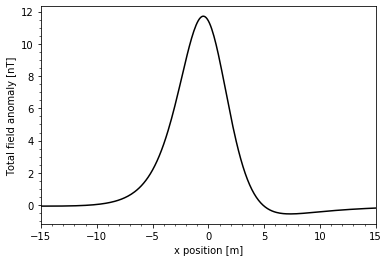

In [7]:
lat = np.deg2rad(70) #latitude expressed in radians
I = np.arctan(2*np.tan(lat)) #geomagnetic field inclination in radians
FA = dipole_FA(m,I,F,x,z) #total field anomaly for each position
plt.plot(x,FA,'-k') #plot horizontal position versus total field anomaly
plt.xlabel('x position [m]') #label the x-axis
plt.ylabel('Total field anomaly [nT]') #label the y-axis
plt.xlim([-15,15]) #set horizontal limit to -15m and +15m
plt.minorticks_on() #add minor ticks to the plot
plt.show() #show the final plot

<hr 
   style="
      border:none;
      height:3px;
      background-color:black;
   ">

## Fall-off rates
Obtaining depth information concerning geological bodies is
essential if we are to produce geologically sensible models from
magnetic exploration data. The characteristics of a measured
magnetic anomaly depend not only on the properties of the
geological body but also the distance which separate it and the
magnetometer. The deeper a body is buried the wider the anomaly
will be at the ground surface. In addition, as the depth of a body
increases the magnitude of the anomaly that it produces at the
Earth's surface will decrease because the magnetic field decays with distance.

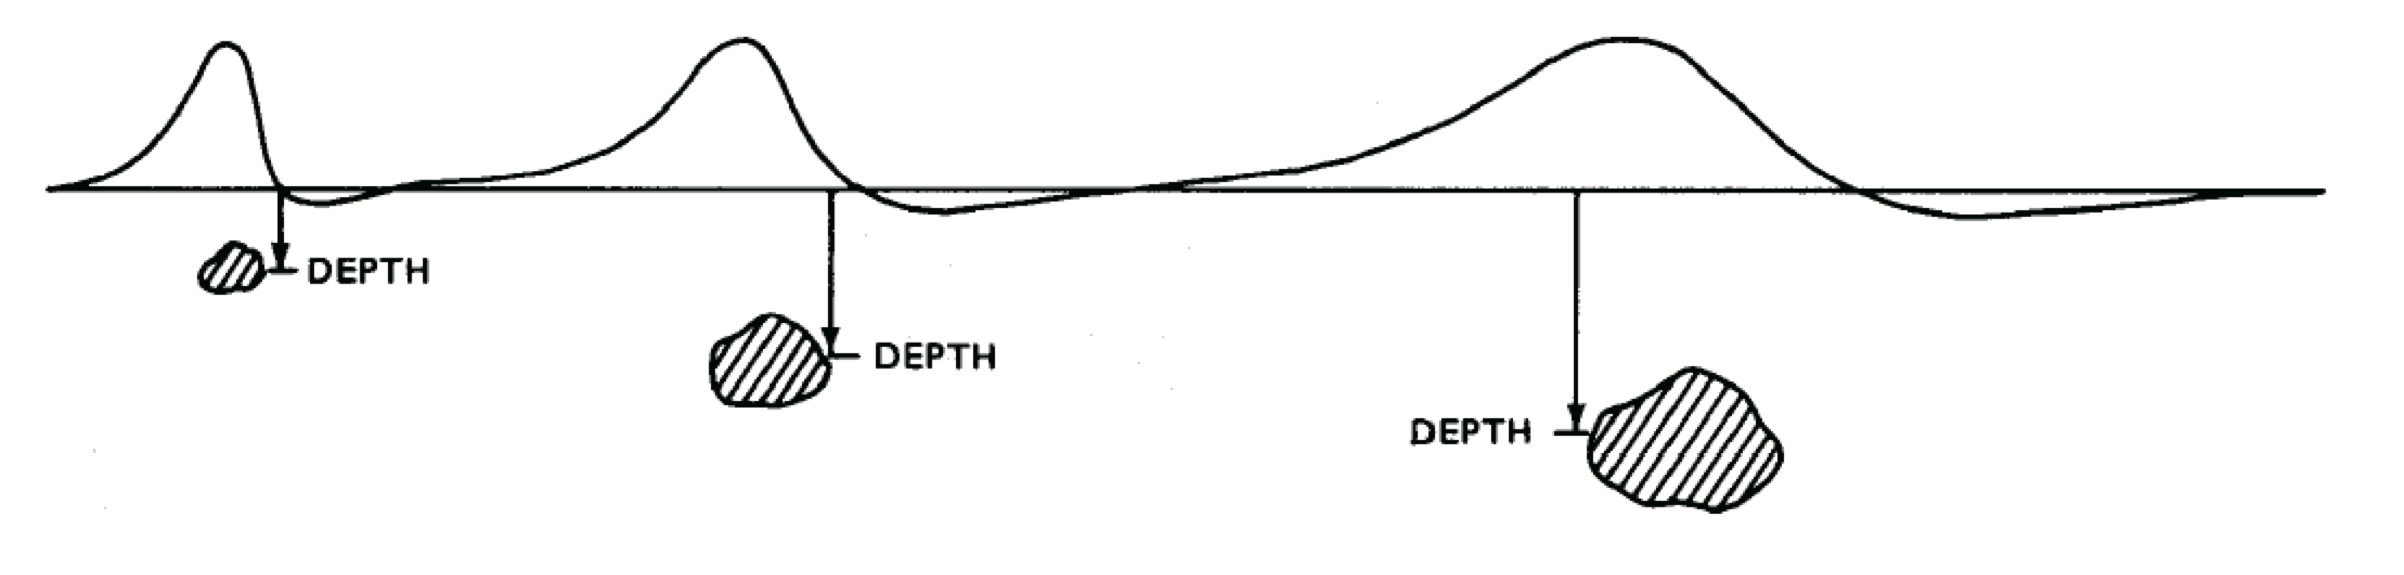

*As the geological body moves to greater depths the width (or wavelength) of the anomaly increases. Also the height of the anomaly decreases with depth, therefore if we want to make the anomalies in the diagram all the same magnitude, we must increase the size of the body (taken from Breiner 1973).*

The rate at which the amplitude of the magnetic anomaly decreases
with depth can provide useful indications as to the shape of
buried geological body. Different shaped bodies have different
fall-off rates.

### Question 2: Fall-off rate of a dipole anomaly
#### (a) Using the dipole anomaly model you created in Question 1(a), find the maximum anomaly height for the same dipole across a sequence of depths with a spacing of 0.5 m from $z$ = 1 m to $z$ = 5 m. Make a plot of anomaly height versus dipole depth based on a field inclination of +90$^\circ$.

We will use the model you created in the previous section to study fall-off rate of a dipole anomaly. Specifically, we can find the anomaly amplitude as a function of depth and then determine the fall-off rate. We'll do this inside a *loop*, which will calculate in turn the anomaly for each depth value. 

In [8]:
z0 = np.arange(1,5.1,0.5) #define an array of depths to be considered
F0 = np.zeros(z0.shape) #array for the anomaly amplitudes
I = np.deg2rad(90) #field inclination of +90 degrees, converted to radians
for i in range(z0.size): #loop though each depth value
    FA = dipole_FA(m,np.pi/4,F,x,z0[i]) #dipole anomaly for the given depth
    F0[i] = np.max(np.abs(FA)) #find the maximum amplitude of the anomaly

#### (b) Make a log-log plot of anomaly height versus dipole depth and estimate the exponent of fall-off rate.

As we discussed in the lecture, if we plot the logarithm of depth against the logarithm of the maximum anomaly amplitude, we should get a straight-line. The gradient of the plotted line will correspond to the exponent of the fall-off rate with respect to depth.

The estimated exponent is -3.00


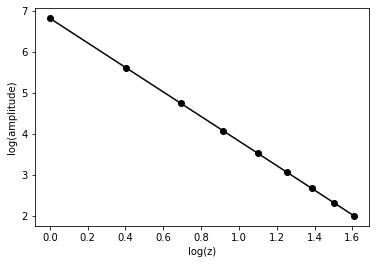

In [9]:
plt.plot(np.log(z0),np.log(F0),'ok-') #plot log depth versus log amplitude
p = np.polyfit(np.log(z0),np.log(F0),1)  #fit a first order polynomial
plt.xlabel('log(z)') #label the x-axis
plt.ylabel('log(amplitude)') #label the y-axis
print('The estimated exponent is {0:2.2f}'.format(p[0])) #print to screen
plt.show() #show the final plot

We see that the estimated exponent is ```-3```, which means that we have a cubic fall-off rate, i.e., $z^{-3}$, which is $1 / {z^3}$. This is the result we expect for a dipole.

#### (c) Does the exponent of the fall-off rate change with the inclination of the geomagnetic field?

It is simple to test this using your model. Try different field inclinations and see if the estimated exponent changes. For example for a field of -45$^\circ$:

The estimated exponent is -3.00


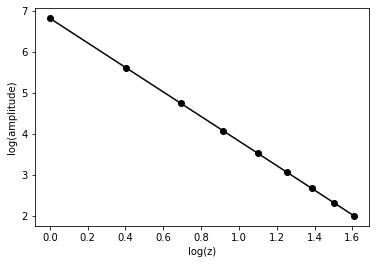

In [10]:
z0 = np.arange(1,5.1,0.5) #define an array of depths to be considered
F0 = np.zeros(z0.shape) #array for anomaly amplitudes
I = np.deg2rad(-45) #field inclination of -45 degrees, converted to radians
for i in range(z0.size): #loop though each depth value
    FA = dipole_FA(m,I,F,x,z0[i]) #dipole anomaly for the given depth
    F0[i] = np.max(np.abs(FA)) #find the maximum amplitude of the anomaly
    
plt.plot(np.log(z0),np.log(F0),'ok-') #plot log depth versus log amplitude
p = np.polyfit(np.log(z0),np.log(F0),1)  #fit a first order polynomial
plt.xlabel('log(z)') #label the x-axis
plt.ylabel('log(amplitude)') #label the y-axis
print('The estimated exponent is {0:2.2f}'.format(p[0])) #print to screen
plt.show()

You should find that the fall-off rate does not depend of the geomagnetic field inclination.

<hr 
   style="
      border:none;
      height:3px;
      background-color:black;
   ">

## Half-width rules
In either horizontal or vertical fields it is possible to estimate
the depth of a simply shaped geological body based on the width of
the anomaly it produces. The half-width is simply the horizontal
width of an anomaly at half of its maximum amplitude value. This yields the depth estimate:

$z = c * x_{1/2}$

where $c$ is a coefficient that will change for anomaly type (*e.g.,* monopole, dipole, etc.,) and the direction of the field (*e.g.,* vertical or horizontal)

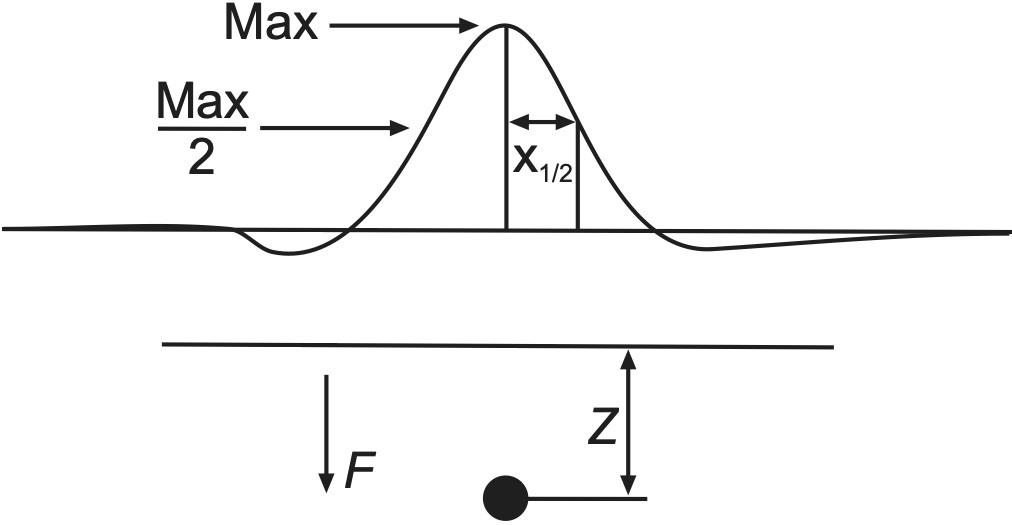

*For simple bodies in vertical or horizontal fields we can relate anomaly half-width, x$_{1/2}$ to body depth $z$. This example involves a vertical field.*

### Question 3: Half-width rules for a dipole anomaly
#### (a) Use your anomaly model to estimate $c$ for a dipole in a vertical field ($I$ = 90$^\circ$). Is your estimate of $c$ consistent with the half-width rules we discussed in lecture 4?

As in the previous questions, we can use our dipole model to estimate $c$ by determining how x$_{1/2}$ changes as a function of $z$. 

Things are a little more complicated because we have to write code to determine the half-width of a give anomaly profile. I've taken a simple approach to this, which is:
1. Calculate the anomaly for a given depth.
2. Find the absolute value of the anomaly (using ```np.abs```) to represent magnitude. 
3. Find the locations where the magnitude is $>$0.5 times the maximum magnitude.
4. Find the most extreme position (in terms of $x$) in the locations selected by the previous step.

In [11]:
z0 = np.arange(1,5.1,0.5) #array of depths to be considered
xhalf = np.zeros(z0.shape) #array to store the estimated half-widths

for i in range(z0.size): #loop through the different depths
    FA = dipole_FA(m,np.pi/2,F,x,z0[i]) #anomaly for I = 90 (step 1)
    FA = np.abs(FA) #absolute value of the anomaly (step 2)
    idx = np.argwhere(FA>=np.max(FA)/2) #magnitude >0.5*max (step 3)
    xhalf[i] = x[idx[-1]] #find the most extreme x position

We can now plot the half-widths are a function of depth and estimate $c$ from the gradient of the relationship: 

Estimated c-value is 2.00


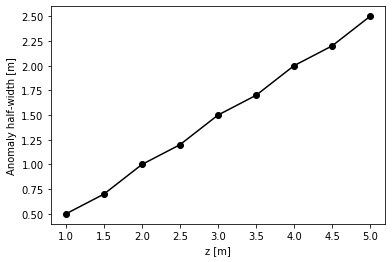

In [12]:
plt.plot(z0,xhalf,'ok-')
p = np.polyfit(xhalf,z0,1)
plt.xlabel('z [m]') #label the x-axis
plt.ylabel('Anomaly half-width [m]') #label the y-axis
print('Estimated c-value is {0:2.2f}'.format(p[0])) #print to screen

In the lecture we saw that for a dipole in a vertical field; $z$ = 2x$_{1/2}$, which is consistent with the result above. Note, the points should fall exactly on a straight-line, but they are slightly offset because the approach I employed to estimating the half-width only provides a crude approximation to the true value.

#### (b) Use your anomaly model to estimate $c$ for a dipole in a horizontal field ($I$ = 0$^\circ$). Is your estimate of $c$ consistent with the half-width rules we discussed in Lecture 4?

To address this question, we can use the code from **(a)** and modify the field inclination to 0$^\circ$.

Estimated c-value is 2.50


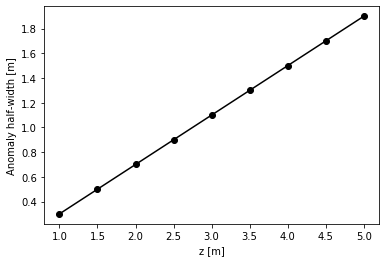

In [13]:
z0 = np.arange(1,5.1,0.5) #array of depths to be considered
xhalf = np.zeros(z0.shape) #array to store the estimated half-widths

for i in range(z0.size): #loop through the different depths
    FA = dipole_FA(m,0,F,x,z0[i]) #calculate the anomaly for I = 0 (step 1)
    FA = np.abs(FA) #absolute value of the anomaly (step 2)
    idx = np.argwhere(FA>=np.max(FA)/2) #magnitude is >0.5*maximum (step 3)
    xhalf[i] = x[idx[-1]] #find the most extreme x position
    
plt.plot(z0,xhalf,'ok-')
p = np.polyfit(xhalf,z0,1)
plt.xlabel('z [m]') #label the x-axis
plt.ylabel('Anomaly half-width [m]') #label the y-axis
print('Estimated c-value is {0:2.2f}'.format(p[0])) #print to screen

In the lecture we saw that for a dipole in a horizontal field; $z$ = 2.5x$_{1/2}$, which is consistent with the result above.